In [59]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [60]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

# Importing the metric R-square for evaluation
from sklearn.metrics import r2_score

# Importing warnings for ignoring any warnings in the program
import warnings
warnings.filterwarnings("ignore")

In [61]:
# Loading the dataset
admission_data = pd.read_csv("Admission_Preprocess.csv")

# Viewing first 5 rows
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [62]:
# Finding shape of datset
admission_data.shape

# Finding basic information about dataset
admission_data.info()

(500, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [63]:
# Separating the independent and dependent variables
X_data = admission_data.iloc[:,:-1]
y_data = admission_data["Chance of Admit"]

# Finding shape of independent and dependent variables
X_data.shape, y_data.shape

((500, 7), (500,))

In [64]:
# Importing KFold cross-validation for splitting dataset 
from sklearn.model_selection import KFold

# Creating object of KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = None)  #----Performing 5-Fold cross-validation

In [65]:
# Splittting dataset into training and testing part using cross-validation
for train_index, test_index in kf.split(X_data):
    X_train, X_test = X_data.iloc[train_index,:], X_data.iloc[test_index,:]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]

# Finding out the shape of training and testing set
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((400, 7), (100, 7))

((400,), (100,))

In [66]:
# Creating the object of LinearRegression Class
reg = LinearRegression()

# Fititng (Training) the model to the dataset
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# Finding out the slope and intercept terms after fiting the model
print("Slope: %.3f" %reg.coef_[0]) #----Slope
print("Intercept: %.3f" %reg.intercept_) #----Intercept

Slope: 0.002
Intercept: -1.318


In [68]:
# Prediction
y_pred = reg.predict(X_test) #----Prediction on testing set
y_train_pred = reg.predict(X_train) #----Prediction on training set

In [69]:
# Creating a new dataframe having actual and predicted values
comp_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
comp_df.head()
#---Used for comparision purpose

,Actual,Predicted
6,0.75,0.707421
24,0.97,0.963744
25,0.94,0.965284
31,0.74,0.715787
33,0.90,0.939548


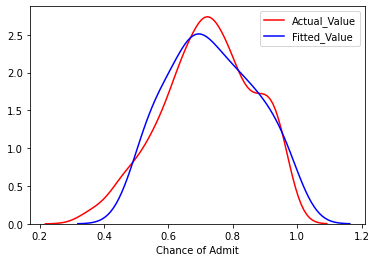

In [70]:
# Visualising the comparision between Actual and Predicted values
ax_1 = sns.distplot(admission_data["Chance of Admit"], hist = False, color = "r", label = "Actual_Value")
sns.distplot(y_pred, hist = False, color = "b", label = "Fitted_Value", ax = ax_1)

In [71]:
# Function for calculating Adjusted R-square
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [72]:
# Model Evaluation using R-square 
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_pred)))

# Model Evaluation using Adjusted R-square
print('Adjusted R^2 train: %.3f, test: %.3f' %(adj_r2(X_train,y_train),adj_r2(X_test,y_test)))

R^2 train: 0.810, test: 0.860
Adjusted R^2 train: 0.807, test: 0.849
